In [1]:
from edgedroid import data as e_data
import pandas as pd

data, neuro_bins, *_  = e_data.load_default_exec_time_data()
data["binned_neuro"] = pd.cut(data["neuroticism"], bins=pd.IntervalIndex(neuro_bins))
data

,run_id,ttf,exec_time,neuroticism,binned_neuro
0,134146,0.597441,3.654797,0.375,"[-inf, 0.5)"
1,134146,0.553513,4.438645,0.375,"[-inf, 0.5)"
2,134146,0.561716,2.943222,0.375,"[-inf, 0.5)"
3,134146,0.586512,5.405761,0.375,"[-inf, 0.5)"
4,134146,0.558940,5.225161,0.375,"[-inf, 0.5)"
...,...,...,...,...,...
6755,137353,0.557074,6.439071,0.625,"[0.5, inf)"
6756,137353,0.534339,4.680858,0.625,"[0.5, inf)"
6757,137353,0.560288,3.467878,0.625,"[0.5, inf)"
6758,137353,0.579000,2.325759,0.625,"[0.5, inf)"


In [2]:
data["next_exec_time"] = data["exec_time"].shift(-1)
data

,run_id,ttf,exec_time,neuroticism,binned_neuro,next_exec_time
0,134146,0.597441,3.654797,0.375,"[-inf, 0.5)",4.438645
1,134146,0.553513,4.438645,0.375,"[-inf, 0.5)",2.943222
2,134146,0.561716,2.943222,0.375,"[-inf, 0.5)",5.405761
3,134146,0.586512,5.405761,0.375,"[-inf, 0.5)",5.225161
4,134146,0.558940,5.225161,0.375,"[-inf, 0.5)",4.780642
...,...,...,...,...,...,...
6755,137353,0.557074,6.439071,0.625,"[0.5, inf)",4.680858
6756,137353,0.534339,4.680858,0.625,"[0.5, inf)",3.467878
6757,137353,0.560288,3.467878,0.625,"[0.5, inf)",2.325759
6758,137353,0.579000,2.325759,0.625,"[0.5, inf)",4.615283


In [3]:
import numpy as np
import numpy.typing as npt
import pandas as pd

def _convolve_kernel(arr: pd.Series, kernel: npt.NDArray):
    index = arr.index
    arr = arr.to_numpy()
    lkernel = np.concatenate([np.zeros(kernel.size - 1), kernel / kernel.sum()])
    return pd.Series(np.convolve(arr, lkernel, "same"), index=index)

def make_kernel(window: int, exp_factor: float = 0.7):
    kernel = np.zeros(window)
    for i in range(window):
        kernel[i] = np.exp(-exp_factor * i)

    return kernel / kernel.sum()


# rolling_ttf = data.groupby("run_id")["ttf"].rolling(8, closed="both", min_periods=1).mean()
# rolling_ttf.index = rolling_ttf.index.droplevel(0)
# rolling_ttf
data["rolling_ttf"] = data.groupby("run_id")["ttf"].apply(lambda arr: _convolve_kernel(arr, make_kernel(8)))
data

,run_id,ttf,exec_time,neuroticism,binned_neuro,next_exec_time,rolling_ttf
0,134146,0.597441,3.654797,0.375,"[-inf, 0.5)",4.438645,0.301877
1,134146,0.553513,4.438645,0.375,"[-inf, 0.5)",2.943222,0.429589
2,134146,0.561716,2.943222,0.375,"[-inf, 0.5)",5.405761,0.497153
3,134146,0.586512,5.405761,0.375,"[-inf, 0.5)",5.225161,0.543234
4,134146,0.558940,5.225161,0.375,"[-inf, 0.5)",4.780642,0.552185
...,...,...,...,...,...,...,...
6755,137353,0.557074,6.439071,0.625,"[0.5, inf)",4.680858,0.571342
6756,137353,0.534339,4.680858,0.625,"[0.5, inf)",3.467878,0.547163
6757,137353,0.560288,3.467878,0.625,"[0.5, inf)",2.325759,0.553766
6758,137353,0.579000,2.325759,0.625,"[0.5, inf)",4.615283,0.566538


In [11]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.5)
sns.set_palette("Dark2")

In [38]:
data["binned_rolling_ttf"] = pd.qcut(data["rolling_ttf"], 7)
data

,run_id,ttf,exec_time,neuroticism,binned_neuro,next_exec_time,rolling_ttf,binned_rolling_ttf
0,134146,0.597441,3.654797,0.375,"[-inf, 0.5)",4.438645,0.301877,"(0.256, 0.804]"
1,134146,0.553513,4.438645,0.375,"[-inf, 0.5)",2.943222,0.429589,"(0.256, 0.804]"
2,134146,0.561716,2.943222,0.375,"[-inf, 0.5)",5.405761,0.497153,"(0.256, 0.804]"
3,134146,0.586512,5.405761,0.375,"[-inf, 0.5)",5.225161,0.543234,"(0.256, 0.804]"
4,134146,0.558940,5.225161,0.375,"[-inf, 0.5)",4.780642,0.552185,"(0.256, 0.804]"
...,...,...,...,...,...,...,...,...
6755,137353,0.557074,6.439071,0.625,"[0.5, inf)",4.680858,0.571342,"(0.256, 0.804]"
6756,137353,0.534339,4.680858,0.625,"[0.5, inf)",3.467878,0.547163,"(0.256, 0.804]"
6757,137353,0.560288,3.467878,0.625,"[0.5, inf)",2.325759,0.553766,"(0.256, 0.804]"
6758,137353,0.579000,2.325759,0.625,"[0.5, inf)",4.615283,0.566538,"(0.256, 0.804]"


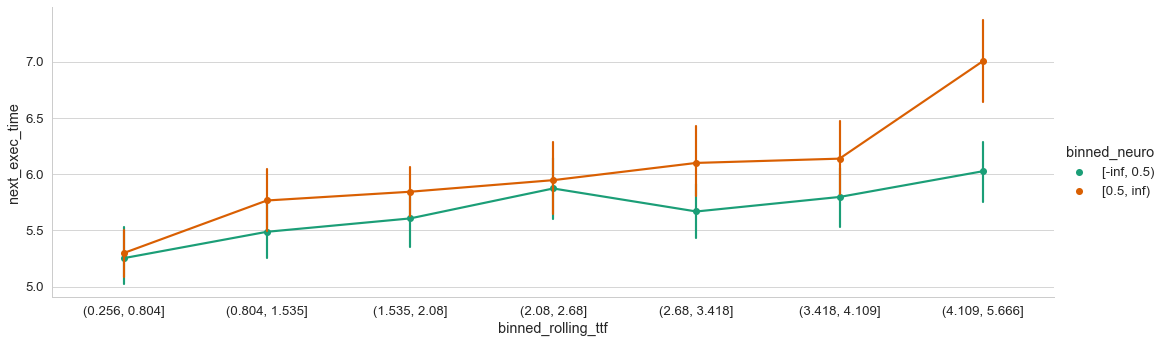

In [39]:
fg = sns.catplot(
    kind="point",
    data=data,
    x="binned_rolling_ttf",
    y="next_exec_time",
    hue="binned_neuro",
    aspect=3,
)
# fg.set(yscale="log")
plt.show()

In [7]:
data.groupby(["binned_neuro", "binned_rolling_ttf"])["next_exec_time"].describe()

count      mean       std       min  \
binned_neuro binned_rolling_ttf                                        
[-inf, 0.5)  (0.256, 0.663]      348.0  5.211518  3.157199  1.970102   
             (0.663, 0.979]      327.0  5.451381  2.324337  1.812792   
             (0.979, 1.594]      332.0  5.551211  3.201773  1.354712   
             (1.594, 1.957]      346.0  5.562356  3.032195  1.438176   
             (1.957, 2.391]      330.0  5.799908  2.576853  1.303871   
             (2.391, 2.794]      347.0  5.911698  3.371917  1.683687   
             (2.794, 3.341]      354.0  5.489967  2.641172  0.273121   
             (3.341, 3.807]      340.0  5.889976  3.417091  0.133624   
             (3.807, 4.343]      329.0  5.852836  2.763118  0.123340   
             (4.343, 5.666]      327.0  6.002856  3.121027  0.175089   
[0.5, inf)   (0.256, 0.663]      327.0  5.153166  2.271823  1.851984   
             (0.663, 0.979]      349.0  5.788864  3.292640  1.809406   
             (0.979, 1.594]      344.0  5.641504  2.660901  0.020927   
             (1.594, 1.957]      330.0  5.851473  2.531443  1.462014   
             (1.957, 2.391]      346.0  6.152304  4.004616  1.120592   
             (2.391, 2.794]      329.0  5.838678  2.870034  1.703150   
             (2.794, 3.341]      322.0  6.121501  3.168957  0.378995   
             (3.341, 3.807]      336.0  5.765703  2.795390  0.161255   
             (3.807, 4.343]      347.0  7.026934  5.038394  0.023168   
             (4.343, 5.666]      349.0  6.769143  3.589777  0.000355   

                                      25%       50%       75%        max  
binned_neuro binned_rolling_ttf                                           
[-inf, 0.5)  (0.256, 0.663]      3.264488  4.441901  6.287237  29.465998  
             (0.663, 0.979]      3.861818  4.972398  6.599571  13.836200  
             (0.979, 1.594]      3.731808  4.906202  6.556762  37.976307  
             (1.594, 1.957]      3.847927  5.036386  6.643094  41.053520  
             (1.957, 2.391]      3.931052  5.308290  7.155712  21.187683  
             (2.391, 2.794]      4.107208  5.342090  7.146699  39.141714  
             (2.794, 3.341]      3.635205  4.935742  6.708047  21.142318  
             (3.341, 3.807]      3.734998  5.143782  7.151413  30.155684  
             (3.807, 4.343]      4.026082  5.236977  6.962402  23.281870  
             (4.343, 5.666]      3.949790  5.345154  7.614038  24.522654  
[0.5, inf)   (0.256, 0.663]      3.503115  4.784415  6.259691  17.938070  
             (0.663, 0.979]      3.868693  5.045681  6.912417  38.249473  
             (0.979, 1.594]      3.854641  5.217835  6.710689  21.727171  
             (1.594, 1.957]      4.271309  5.296002  6.904848  21.248034  
             (1.957, 2.391]      4.206151  5.562858  7.204477  56.162839  
             (2.391, 2.794]      4.103359  5.333694  6.900884  31.801542  
             (2.794, 3.341]      4.310815  5.650898  7.325893  31.048277  
             (3.341, 3.807]      3.854910  5.210638  7.133193  24.797699  
             (3.807, 4.343]      4.180692  5.942817  8.070776  47.027108  
             (4.343, 5.666]      4.344824  6.127109  8.504359  33.812717

In [8]:
_, bins = pd.qcut(data["rolling_ttf"], 10, retbins=True)
bins

array([0.25681675, 0.6632113 , 0.97889626, 1.59350673, 1.95727687,
       2.39139544, 2.79363231, 3.34075913, 3.80706939, 4.34252031,
       5.66585643])

In [9]:
bins = pd.IntervalIndex.from_breaks(bins, closed="right")
bins

IntervalIndex([(0.25681675382338887, 0.66321129814337], (0.66321129814337, 0.9788962622610968], (0.9788962622610968, 1.5935067273364674], (1.5935067273364674, 1.9572768730262402], (1.9572768730262402, 2.3913954438032854], (2.3913954438032854, 2.7936323133049683], (2.7936323133049683, 3.340759133063182], (3.340759133063182, 3.807069392988421], (3.807069392988421, 4.342520310900216], (4.342520310900216, 5.665856433226555]], dtype='interval[float64, right]')

In [10]:
bins[bins.contains(3)][0]

Interval(2.7936323133049683, 3.340759133063182, closed='right')